In [3]:
include("Julia_Implementation.jl")
using Random
import Pkg #Pkg is the package manager in Julia
using Distributions
using Plots
using LinearAlgebra
using ProgressMeter
Pkg.update()


ArgumentError: ArgumentError: Package Threads not found in current path, maybe you meant `import/using .Threads`.
- Otherwise, run `import Pkg; Pkg.add("Threads")` to install the Threads package.

In [2]:
import Pkg; Pkg.add()

    Updating registry at `C:\Users\Bill\.julia\registries\General.toml`


Pkg.Types.PkgError: The following package names could not be resolved:
 * Threads (not found in project, manifest or registry)
[36m   Suggestions:[39m [0m[1mT[22m[0m[1mh[22m[0m[1mr[22m[0m[1me[22m[0m[1ma[22m[0m[1md[22m[0m[1ms[22mX [0m[1mT[22m[0m[1mh[22m[0m[1mr[22m[0m[1me[22m[0m[1ma[22m[0m[1md[22m[0m[1mS[22mafeDicts [0m[1mT[22m[0m[1mh[22m[0m[1mr[22m[0m[1me[22m[0m[1ma[22m[0m[1md[22med[0m[1mS[22mcans [0m[1mT[22m[0m[1mh[22m[0m[1mr[22m[0m[1me[22m[0m[1ma[22m[0m[1md[22med[0m[1mS[22mparseCSR

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


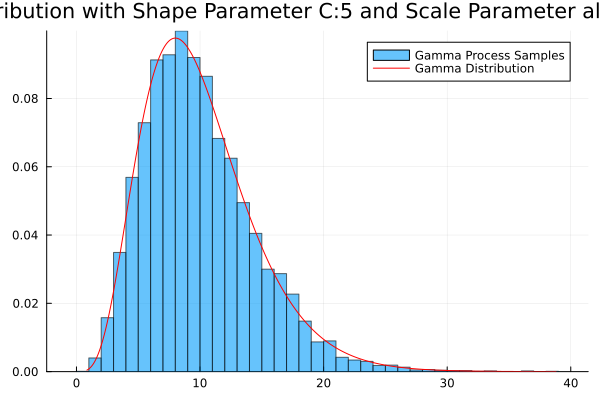

In [1]:
include("Julia_Implementation.jl")
using Random
import Pkg # Pkg is the package manager in Julia
using Distributions
using Plots
using LinearAlgebra
using ProgressMeter
N = 10000 # 样本数量
T = 1 # 模拟时间
beta = 0.5 # 逆比例参数
alpha = 1 / beta # 生成时的比例参数
C = 5 # 速率/形状参数
samples = Float64[]

@showprogress for i in 1:N
    samples_matrix, jump_time_matrix = Julia_Implementation.vectorized_particle_Gamma_generator(beta, C, T, 1, 1, 100)
    gamma_jumps = samples_matrix[1, :]
    gamma_jump_times = jump_time_matrix[1, :]
    sample = Julia_Implementation.integrate([1.0], gamma_jumps, gamma_jump_times)
    push!(samples, sample[1])
end

# 定义x的范围，以匹配samples的范围或更广
x = range(minimum(samples), stop=maximum(samples), length=1000)

p = histogram(samples, bins=50, normalize=true, alpha=0.6, label="Gamma Process Samples")
plot!(p, x, pdf.(Gamma(C, alpha), x), color=:red, label="Gamma Distribution")
title!(p, "Gamma Distribution with Shape Parameter C:$(C) and Scale Parameter alpha (1/beta):$(alpha)")
#legend!(:topright) # 如果需要图例，取消这行注释
display(p)


In [8]:
samples_matrix, jump_time_matrix = Julia_Implementation.vectorized_particle_Gamma_generator(beta, C, T, 1, 1, 100)
print(size(jump_time_matrix))

(1, 100)

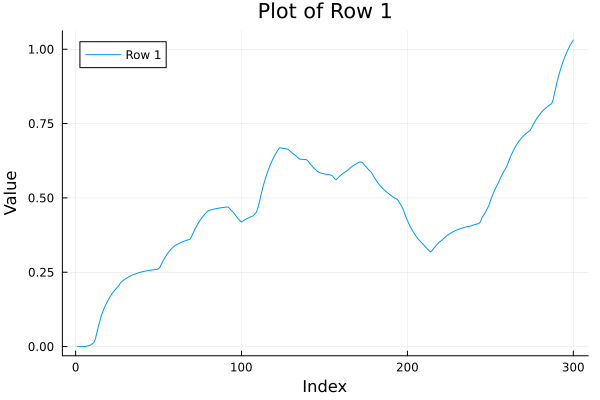

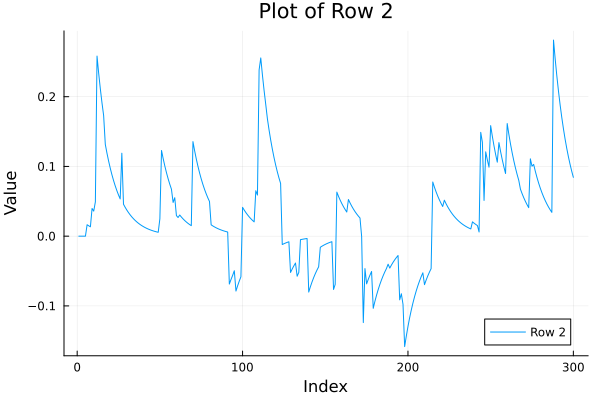

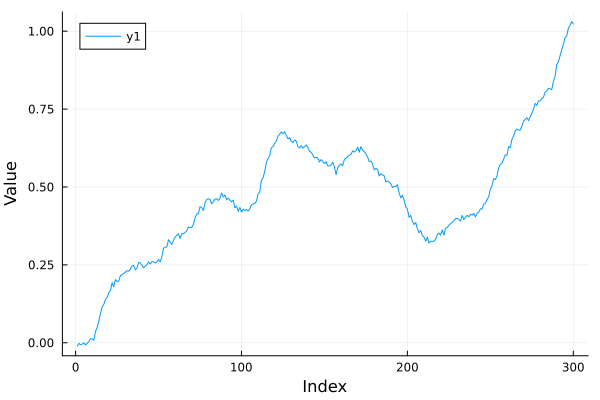

In [2]:
include("Julia_Implementation.jl")
using Random
import Pkg # Pkg is the package manager in Julia
using Distributions
using Plots
using LinearAlgebra
using ProgressMeter

# 参数初始化
beta_pcn = 1.0 # 预条件Crank-Nicolson算法的步长参数
n_iter = 300 # 迭代次数
theta0 = -1.0 # theta的初始猜测
beta0 = 5.0 # beta的初始猜测
C0 = 2.0 # C的初始猜测
num_particles = 1000

# 三个参数的步长
l_theta = 1.0
l_beta = 0.1
l_C = 2.0

# 真实参数值
true_theta = -1.0
kw = 1.0
kv = 0.001
true_sigmaw = 0.2
true_muw = 0.2
sigma_n = true_sigmaw * sqrt(kv)

# 模拟参数
true_beta = 5.0
true_C = 2.0
T = 30.0
N = 10 * round(Int,T) # 分辨率

# 定义Langevin动力学
A = zeros(2, 2)
A[1, 2] = 1.0
A[2, 2] = true_theta
h = [0.0, 1.0]
# 模拟
evaluation_points = range(0, T, length=N)
#print("Hi")
subordinator_jumps, jump_times = Julia_Implementation.vectorized_particle_Gamma_generator(true_beta, true_C, T, 1, 1, 100)# subordinator jump sizes and times
samples = Julia_Implementation.generate_SDE_samples(subordinator_jumps,jump_times,true_muw,true_sigmaw,A,h,evaluation_points)
#print(size(samples))
# 分开绘制每一行
for i in 1:size(samples, 1)
    plot(samples[i, :], label=string("Row ", i))
    title!("Plot of Row $i")
    xlabel!("Index")
    ylabel!("Value")
    display(plot!()) # 使用 display 来显示图表
end

# 生成噪声观测数据
Noisy_samples = samples[1, :] .+ randn(length(samples[1, :])) .* sigma_n

#print(size(Noisy_samples))
# 下一步是基于这些数据进行参数估计或其他分析，这部分代码取决于具体的分析目标
plot(Noisy_samples)
xlabel!("Index")
ylabel!("Value")
display(plot!())





In [1]:
include("Julia_Implementation.jl")
using Random
import Pkg # Pkg is the package manager in Julia
using Distributions
using Plots
using LinearAlgebra
using ProgressMeter

# 参数初始化
beta_pcn = 1.0 # 预条件Crank-Nicolson算法的步长参数
n_iter = 300 # 迭代次数
theta0 = -1.0 # theta的初始猜测
beta0 = 5.0 # beta的初始猜测
C0 = 2.0 # C的初始猜测
num_particles = 1000

# 三个参数的步长
l_theta = 1.0
l_beta = 0.1
l_C = 2.0

# 真实参数值
true_theta = -1.0
kw = 1.0
kv = 0.001
true_sigmaw = 0.2
true_muw = 0.2
sigma_n = true_sigmaw * sqrt(kv)

# 模拟参数
true_beta = 5.0
true_C = 2.0
T = 30.0
N = 10 * round(Int,T) # 分辨率

# 定义Langevin动力学
A = zeros(2, 2)
A[1, 2] = 1.0
A[2, 2] = true_theta
h = [0.0, 1.0]
# 模拟
evaluation_points = range(0, T, length=N)

# 粒子滤波器初始化
trajectory = []

nx0 = 2
X0 = zeros(nx0 + 1, 1)
nx0_new = 3

C_prior = zeros(nx0_new, nx0_new)
C_prior[end, end] = kw

g = [1 0 0]'
R = [kv]

initial_particles = [(zeros(nx0, 1), Matrix{Float64}(I, nx0, nx0)) for _ in 1:num_particles]
previous_Xs = [copy(X0) for _ in 1:num_particles]
previous_X_uncertainties = [copy(C_prior) for _ in 1:num_particles]

initial_weights = ones(num_particles) ./ num_particles

dt = evaluation_points[2] - evaluation_points[1]
matrix_exp = exp(A * dt)
sigma = sigma_n

inferred_Xs = []
inferred_covs = []

particles = initial_particles
histories = [particles]
weights = initial_weights

sigmaw2_values = []
sigmaw2_uncertainties = []
alphas = []
betas = []

mean_proposals, cov_proposals = Julia_Implementation.vectorized_particle_transition_function(true_beta, true_C, T, N, num_particles, A, h, 10)



DimensionMismatch: DimensionMismatch: arrays could not be broadcast to a common size; got a dimension with lengths 1000 and 2